In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np, seaborn as sns , matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



In [18]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Nothing to encode

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no null values

In [20]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [21]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

A bit imbalanced

In [22]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Maximum of Cholesterol seems a bit too high.

In [23]:
from scipy.stats import normaltest

C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


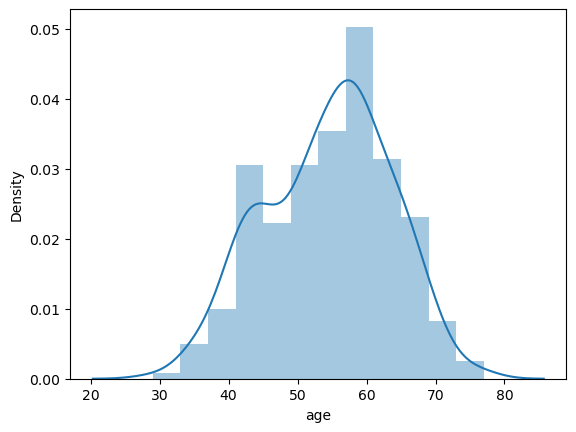

C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


NormaltestResult(statistic=8.74798581312778, pvalue=0.012600826063683705)


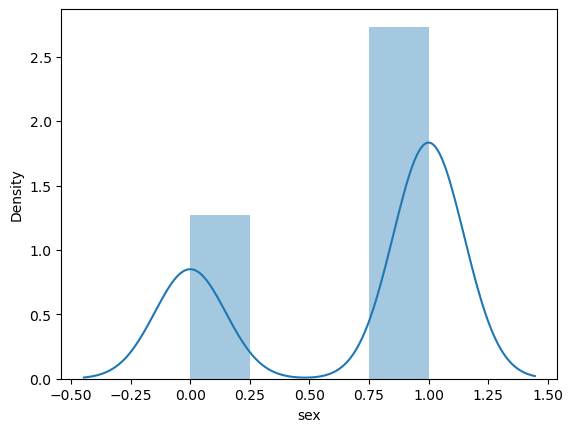

NormaltestResult(statistic=947.845992573034, pvalue=1.5061140700832218e-206)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


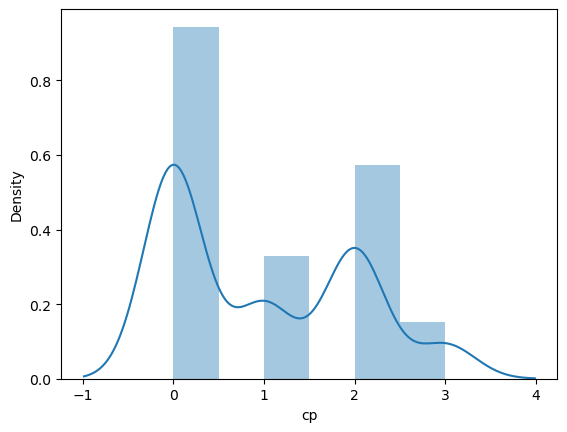

NormaltestResult(statistic=168.43868174733004, pvalue=2.654636057423714e-37)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


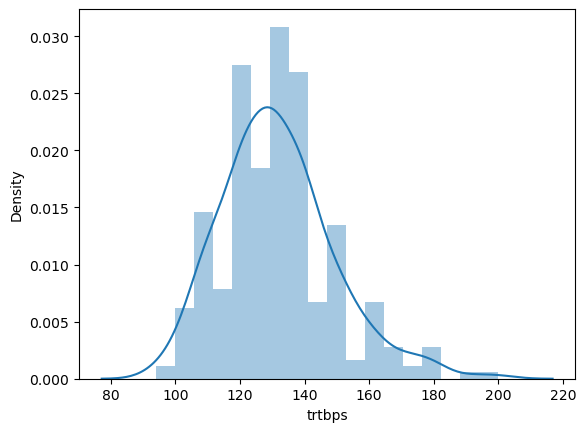

NormaltestResult(statistic=28.567604502994023, pvalue=6.260708761946876e-07)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


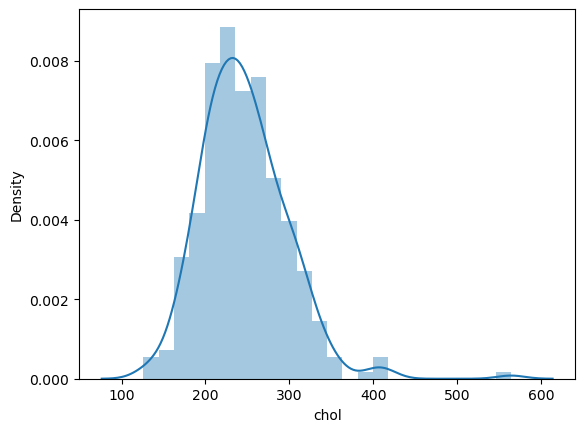

NormaltestResult(statistic=83.50370500964404, pvalue=7.368869203474054e-19)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


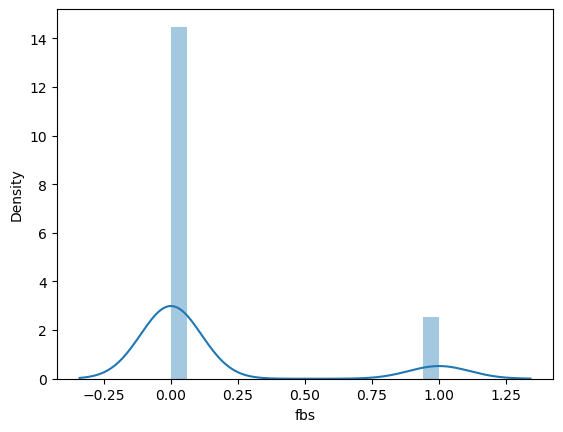

NormaltestResult(statistic=111.74408896317725, pvalue=5.433496466822932e-25)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


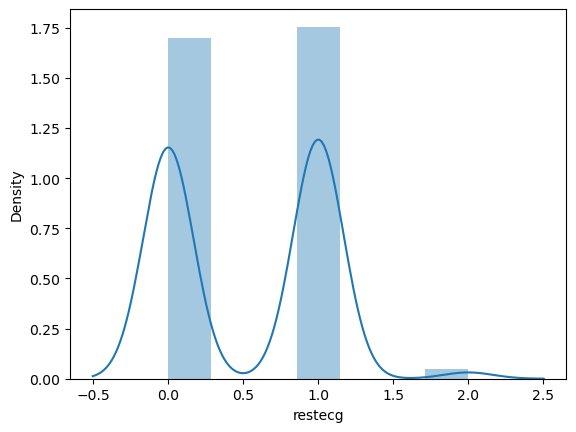

C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


NormaltestResult(statistic=673.9636558637226, pvalue=4.473543116954668e-147)


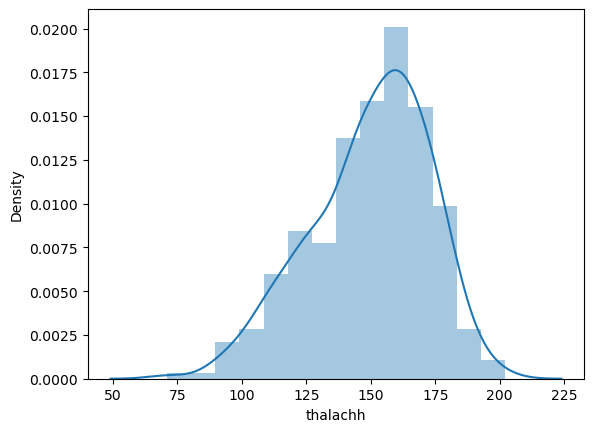

NormaltestResult(statistic=13.46672289054534, pvalue=0.0011905243421222172)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


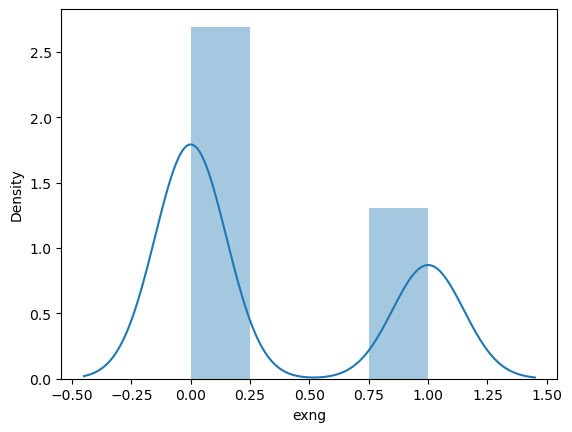

C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


NormaltestResult(statistic=7230.661508434152, pvalue=0.0)


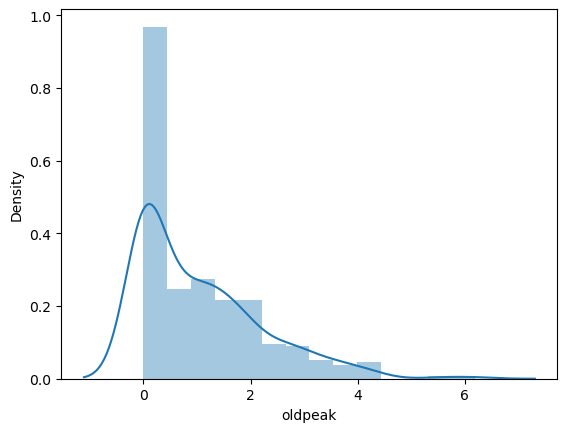

NormaltestResult(statistic=66.6201580770229, pvalue=3.4167757949760942e-15)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


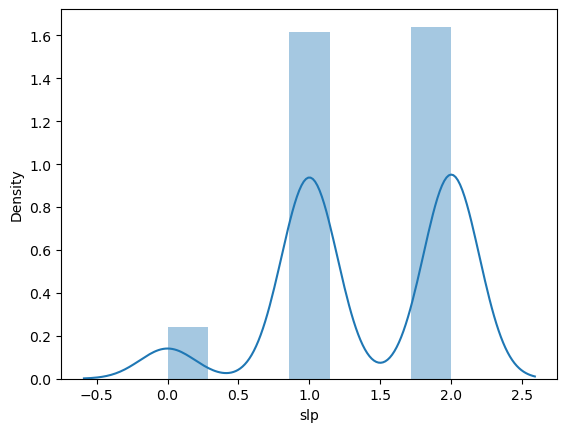

C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


NormaltestResult(statistic=22.444059802777566, pvalue=1.3376248799032395e-05)


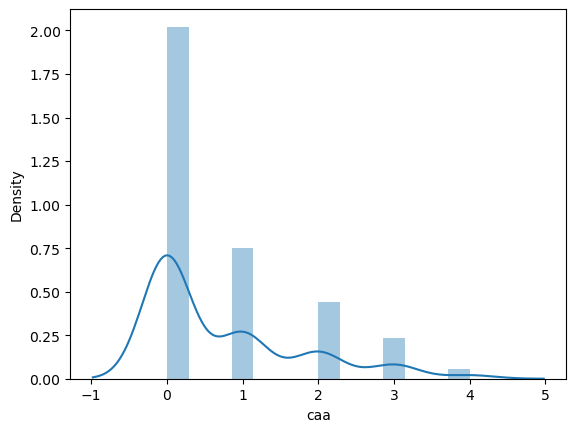

NormaltestResult(statistic=61.78525877193141, pvalue=3.832670872706147e-14)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


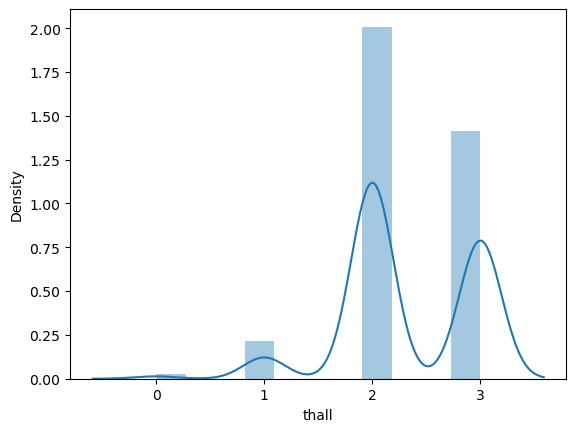

NormaltestResult(statistic=12.0186071759252, pvalue=0.002455797832205547)


C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\3287235335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


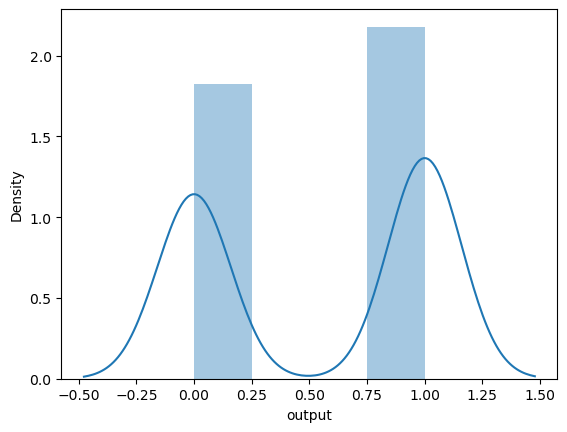

NormaltestResult(statistic=1445.2136592053423, pvalue=0.0)


In [24]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    print(normaltest(df[i]))

Distribution plot and normal test to check the distribution of the features

In [25]:
df[['thalachh','chol']].describe()

,thalachh,chol
count,303.000000,303.000000
mean,149.646865,246.264026
std,22.905161,51.830751
min,71.000000,126.000000
25%,133.500000,211.000000
50%,153.000000,240.000000
75%,166.000000,274.500000
max,202.000000,564.000000


In [26]:
df['chol'] = np.where(df['chol'] > 400, df['chol'].mean(), df['chol'])

C:\Users\alvin\AppData\Local\Temp\ipykernel_86680\1384229396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'])


<Axes: xlabel='chol', ylabel='Density'>

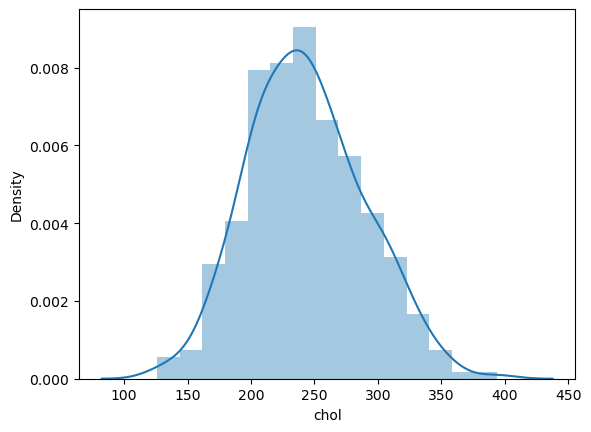

In [27]:
sns.distplot(df['chol'])

Normal Distribution

In [28]:
from scipy.stats import boxcox

In [29]:
df['thalachh']=np.cbrt(df['thalachh'])

In [30]:
normaltest(df['thalachh'])

NormaltestResult(statistic=32.02784688825827, pvalue=1.1097915521452382e-07)

In [31]:
df.duplicated().sum()

1

Drop the duplicated rows

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.shape

(302, 14)

Checking if the right number of rows were dropped

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
X=df.drop(['output'],axis=1)
y=df['output']

Split the features into input features and output feature

In [36]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

Using StartifiedShuffleSplit to ensure balanced class distribution

In [37]:
for train_idx,test_idx in sss.split(X,y):
    X_train,y_train=X.iloc[train_idx],y.iloc[train_idx]
    X_test,y_test=X.iloc[test_idx],y.iloc[test_idx]

In [38]:
print(y_train.value_counts(),y_test.value_counts())

output
1    115
0     96
Name: count, dtype: int64 output
1    49
0    42
Name: count, dtype: int64


Proportionally equal distribution

In [39]:
print((y_train.value_counts()/y_train.shape[0]),(y_test.value_counts()/y_test.shape[0]))

output
1    0.545024
0    0.454976
Name: count, dtype: float64 output
1    0.538462
0    0.461538
Name: count, dtype: float64


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [41]:
estimator=Pipeline([("poly",PolynomialFeatures(interaction_only=True, include_bias=False)),
                    ("scaler",StandardScaler()),
                    ("lr",LogisticRegression(penalty='l2',solver='liblinear'))])
params={'lr__C':np.geomspace(0.00001,1,10),
        'lr__max_iter':(100,300,1000),
        'poly__degree':(2,3,4)}

In [42]:
grid=GridSearchCV(estimator,params,cv=4)

In [43]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False,
                                                           interaction_only=True)),
                                       ('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'lr__C': array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00]),
                         'lr__max_iter': (100, 300, 1000),
                         'poly__degree': (2, 3, 4)})

In [44]:
model=grid.best_estimator_

In [45]:
grid.best_params_

{'lr__C': 0.005994842503189409, 'lr__max_iter': 100, 'poly__degree': 2}

In [46]:
pred=model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
print(confusion_matrix(y_test,pred),"\n",classification_report(y_test,pred))

[[28 14]
 [ 4 45]] 
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.76      0.92      0.83        49

    accuracy                           0.80        91
   macro avg       0.82      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91

